<p style="font-size:300%;text-align:center"> USED CAR PRICE PREDICTION </p>

## Project Overview
This project can be used as a comprehensive guide for Exploratory Data Analysis (EDA) and machine learning techniques for the task of predicting used car prices, accompanied by advice for practitioners. It will include:

* Exploratory Data Analysis (EDA)
* Data Preprocessing
* Building and Training the Used Car Price Prediction Model
* Evaluating Model Performance
* Advice for Practitioners


## Problem statement
Predicting used car prices is a common problem in the field of machine learning and data analysis. The goal of this project is to build a model that can predict the price of a used car based on its attributes, such as the year of manufacture, brand, model, mileage, etc.


## Dataset
In this dataset have:

* [Unnamed: 0]
* Name: Name of the car.
* Location: The location where the car is sold.
* Year: The manufacturing year of the car.
* Kilometers_Driven: The number of kilometers the car has been driven.
* Fuel_Type: The type of fuel used by the car.
* Transmission: The type of transmission system in the car.
* Owner_Type: The type of ownership of the car.
* Mileage: The fuel efficiency of the car.
* Engine: The engine capacity of the car.
* Power: The engine power of the car.
* Seats: The number of seats in the car.    
* New_Price: 
* Price: The current market price of the car.


This dataset could be founded  in the Kaggle Dataset [used-car-price](https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction)


In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px
import sqlite3

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import pickle
import json


In [304]:
df = pd.read_csv('./data/train_data.csv')

In [305]:
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


### 1. Cleaning Data & Feature Engineering

#### Data shape

In [306]:
print('Train shape:', df.shape)

Train shape: (6019, 14)


#### Handle column [Unnamed: 0] 

In [307]:
df['Unnamed: 0']

0          0
1          1
2          2
3          3
4          4
        ... 
6014    6014
6015    6015
6016    6016
6017    6017
6018    6018
Name: Unnamed: 0, Length: 6019, dtype: int64

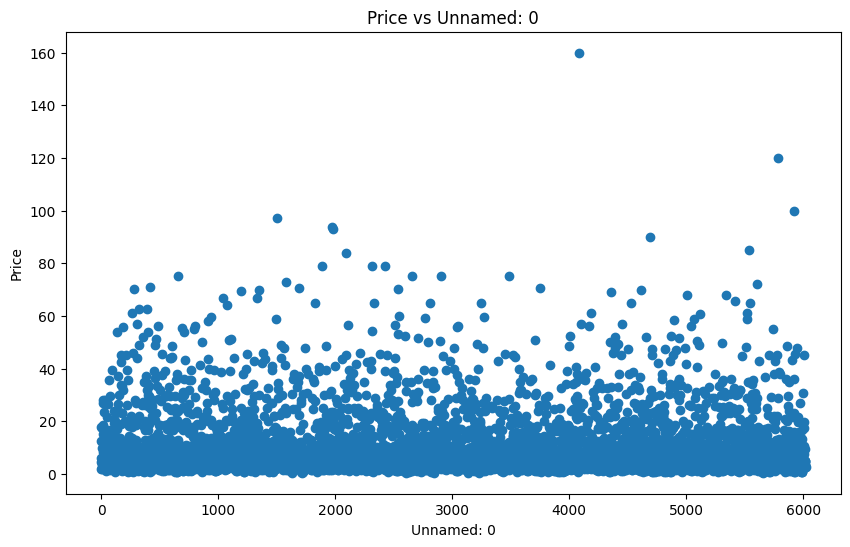

In [308]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Unnamed: 0'], df['Price'])
plt.xlabel('Unnamed: 0')
plt.ylabel('Price')
plt.title('Price vs Unnamed: 0')
plt.show()

We can see that there is no relationship between 'Unnamed: 0' vs 'Price' and it look like index of the dataset so we will drop it

In [309]:
df = df.drop('Unnamed: 0', axis=1)

#### Checking duplicated

In [310]:
df.duplicated().sum()

0

#### Checking the unit of mileage

In [311]:
# Get unique values of Mileage
df['Mileage'].str.split().str[1].unique()

array(['km/kg', 'kmpl', nan], dtype=object)

In [312]:
# Get value when unit of Mileage is km/kg
kmkg_df = df[df['Mileage'].str.split().str[1] == 'km/kg']
kmkg_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,17.5 km/kg,1373 CC,80.46 bhp,7.0,NaN,8.25
5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.70
5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.25
5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,3.10


In [313]:
# Get values with CNG and LPG Fuel Type
cng_lpg_df  = df[(df['Fuel_Type'] == 'CNG') | (df['Fuel_Type'] == 'LPG')]
cng_lpg_df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
127,Maruti Wagon R LXI CNG,Pune,2013,89900,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.25
328,Maruti Zen Estilo LXI Green (CNG),Pune,2008,42496,CNG,Manual,First,26.3 km/kg,998 CC,67.1 bhp,5.0,NaN,1.40
440,Maruti Eeco 5 STR With AC Plus HTR CNG,Kochi,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,NaN,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5876,Maruti Ertiga VXI CNG,Mumbai,2017,23700,CNG,Manual,First,17.5 km/kg,1373 CC,80.46 bhp,7.0,NaN,8.25
5881,Maruti Wagon R LXI CNG,Pune,2015,55000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,3.70
5902,Maruti Wagon R LXI CNG,Mumbai,2012,72000,CNG,Manual,First,26.2 km/kg,998 CC,58.2 bhp,5.0,NaN,2.25
5935,Maruti Alto K10 LXI CNG,Pune,2015,59525,CNG,Manual,Second,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,3.10


In [314]:
# Check if the two dataframes are equal
kmkg_df.equals(cng_lpg_df)

True

CNG and LPG mileage is measured in km/kg where as for other type it is measured in kmpl. Since those units are in km for both of them no need of conversion.

Remove unit of the mileage

In [315]:
# Remove km/kg and kmpl from Mileage
df['Mileage'] = df['Mileage'].str.split().str[0]

In [316]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Checking Fuel_Type

In [317]:
pd.DataFrame(df['Fuel_Type'].value_counts())

,count
Fuel_Type,
Diesel,3205
Petrol,2746
CNG,56
LPG,10
Electric,2


In [318]:
df[df['Fuel_Type'] == 'Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


We can see that there is only 2 varibles have electric so we will remove it.

In [319]:
df.drop(df[df['Fuel_Type'] == 'Electric'].index, inplace=True)

#### Check unit of the Engine

In [320]:
# Check unit of Engine
df['Engine'].str.split().str[1].unique()

array(['CC', nan], dtype=object)

In [321]:
# Remove CC from Engine
df['Engine'] = df['Engine'].str.split().str[0]

In [322]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8 bhp,5.0,NaN,17.74


#### Check unit of Power

In [323]:
# Check unit of Power
df['Power'].str.split().str[1].unique()

array(['bhp', nan], dtype=object)

In [324]:
df[df['Power'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399,null bhp,5.0,NaN,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086,null bhp,5.0,NaN,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086,null bhp,5.0,NaN,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086,null bhp,5.0,NaN,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086,null bhp,5.0,NaN,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0,1086,null bhp,5.0,NaN,1.20
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061,null bhp,NaN,NaN,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5,1798,null bhp,5.0,NaN,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112,null bhp,6.0,NaN,1.70


In [325]:
# Remove bhp and replace null with NaN 
df['Power'] = df['Power'].str.rstrip(' bhp')
df['Power'] = df['Power'].replace(regex='null', value=np.nan)

In [326]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


In [327]:
# Check 0.0 values in Mileage, Engine and Power
num = ['Mileage', 'Engine', 'Power']
for n in num:
    print(n, '0.0 values:', df[df[n] == '0.0'].shape[0])


Mileage 0.0 values: 68
Engine 0.0 values: 0
Power 0.0 values: 0


In [328]:
# Replace 0.0 values with NaN
df['Mileage'] = df['Mileage'].replace('0.0', np.nan)

Changing to NaN so we can handle it when we handle missing values

#### Checking Tranmission

In [329]:
# Check Transmission values
df['Transmission'].value_counts()

Transmission
Manual       4299
Automatic    1718
Name: count, dtype: int64

#### Checking Owner_Type

In [330]:
# Check Owner_Type values
df['Owner_Type'].value_counts()

Owner_Type
First             4927
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64

#### Processing Seats

In [331]:
# Processing seats
df['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [332]:
df[df['Seats'] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197,NaN,0.0,NaN,18.0


Seats can not be 0 so we will change it to NaN and handle it later.

In [333]:
df.loc[3999, 'Seats'] = np.nan

In [334]:
df.iloc[3999]

Name                 Audi A4 3.2 FSI Tiptronic Quattro
Location                                     Hyderabad
Year                                              2012
Kilometers_Driven                               125000
Fuel_Type                                       Petrol
Transmission                                 Automatic
Owner_Type                                       First
Mileage                                           10.5
Engine                                            3197
Power                                              NaN
Seats                                              NaN
New_Price                                          NaN
Price                                             18.0
Name: 3999, dtype: object

#### Processing New Price

In [335]:
# Check New_Price
df['New_Price'].isnull().sum()

5194

In [336]:
df['New_Price'].isnull().sum() / df.shape[0] * 100

86.32208741897955

We can see that 86.31% values in New_Price column is null, there is a lot. So we will drop this column.

In [337]:
df = df.drop('New_Price', axis=1)

#### Change Price from Lakh to USD
1 Lakh = 100000 Rupee (India money)

 1 USD = 83.7 Rupee

In [338]:
df['Price'] = round(df['Price'] * 100000 * (1/83.7), 2)

In [339]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,2090.80
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,14934.29
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,5376.34
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,7168.46
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,21194.74


#### Converting Datatype

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            5949 non-null   object 
 8   Engine             5981 non-null   object 
 9   Power              5874 non-null   object 
 10  Seats              5974 non-null   float64
 11  Price              6017 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 740.1+ KB


In [341]:
# Converting data types
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner_Type'] = df['Owner_Type'].astype('category')
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].astype(float)
df['Seats'] = df['Seats'].astype(float)


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6017 non-null   object  
 1   Location           6017 non-null   object  
 2   Year               6017 non-null   int64   
 3   Kilometers_Driven  6017 non-null   int64   
 4   Fuel_Type          6017 non-null   category
 5   Transmission       6017 non-null   category
 6   Owner_Type         6017 non-null   category
 7   Mileage            5949 non-null   float64 
 8   Engine             5981 non-null   float64 
 9   Power              5874 non-null   float64 
 10  Seats              5974 non-null   float64 
 11  Price              6017 non-null   float64 
dtypes: category(3), float64(5), int64(2), object(2)
memory usage: 617.3+ KB


In [343]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6017.0,2013.358152,3.269967,1998.00,2011.0,2014.00,2016.00,2019.00
Kilometers_Driven,6017.0,58742.282034,91283.745583,171.00,34000.0,53000.00,73000.00,6500000.00
Mileage,5949.0,18.342252,4.175475,6.40,15.3,18.20,21.10,33.54
Engine,5981.0,1621.505935,601.117630,624.00,1198.0,1493.00,1984.00,5998.00
Power,5874.0,113.272203,53.873317,34.20,75.0,97.70,138.10,560.00
Seats,5974.0,5.279712,0.806138,2.00,5.0,5.00,5.00,10.00
Price,6017.0,11324.181270,13368.703773,525.69,4181.6,6738.35,11887.69,191158.90


#### Processing Years to Derive Age of car

Creating a new column is Age of the car.

In [344]:
df['Current_Year'] = 2024
df['AgeofCar'] = df['Current_Year'] - df['Year']
df = df.drop(['Current_Year'], axis=1)

In [345]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,AgeofCar
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,2090.80,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,14934.29,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,5376.34,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,7168.46,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,21194.74,11


#### Processing Name and Location column

Brands do play an important role in Car selection and Prices.

In [346]:
# Get the brand name from the name of the car
df['Brand'] = df['Name'].str.split().str[0]

In [347]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [348]:
df[df['Brand'] == 'Mini'].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,AgeofCar,Brand
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,27479.09,7,Mini
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,42616.49,7,Mini
365,Mini Clubman Cooper S,Pune,2017,8350,Petrol,Manual,First,13.80,1998.0,192.00,5.0,41816.01,7,Mini
391,Mini Cooper Convertible 1.6,Bangalore,2015,20000,Petrol,Automatic,First,18.86,1598.0,122.00,4.0,38231.78,9,Mini
427,Mini Cooper Convertible S,Mumbai,2014,11900,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,34050.18,10,Mini


In [349]:
df[df['Brand'] == 'Land'].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,AgeofCar,Brand
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7,2179.0,187.7,5.0,32258.06,10,Land
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,NaN,2179.0,115.0,5.0,20908.00,12,Land
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7,2179.0,187.7,5.0,66618.88,6,Land
311,Land Rover Range Rover HSE Dynamic,Delhi,2017,44000,Diesel,Automatic,First,12.7,2179.0,187.7,5.0,52568.70,7,Land
399,Land Rover Range Rover 2.2L Dynamic,Hyderabad,2012,56000,Diesel,Automatic,First,12.7,2179.0,187.7,5.0,35842.29,12,Land


In [350]:
df[df['Brand'] == 'Smart'].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,AgeofCar,Brand
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,NaN,799.0,NaN,2.0,3584.23,16,Smart


From the data we can see Mini is stand for Mini Cooper and Land is stand for Land Rover, Isuzu and ISUZU is the same.

In [351]:
df.loc[df['Brand'] == 'Mini', 'Brand'] = 'Mini Cooper'
df.loc[df['Brand'] == 'Land', 'Brand'] = 'Land Rover'
df.loc[df['Brand'] == 'ISUZU', 'Brand'] = 'Isuzu'


In [352]:
df['Brand'] = df['Brand'].astype('category')

In [353]:
df['Brand'].nunique()

30

In [354]:
df.groupby(df['Brand']).size().sort_values(ascending =False)

C:\Users\admin\AppData\Local\Temp\ipykernel_1632\187563718.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(df['Brand']).size().sort_values(ascending =False)


Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini Cooper        26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Lamborghini         1
Smart               1
Bentley             1
Ambassador          1
dtype: int64

There are 30 unique Brands in the dataset.

In [355]:
df['Name'].unique().shape

(1874,)

In [356]:
df['Location'].unique().shape

(11,)

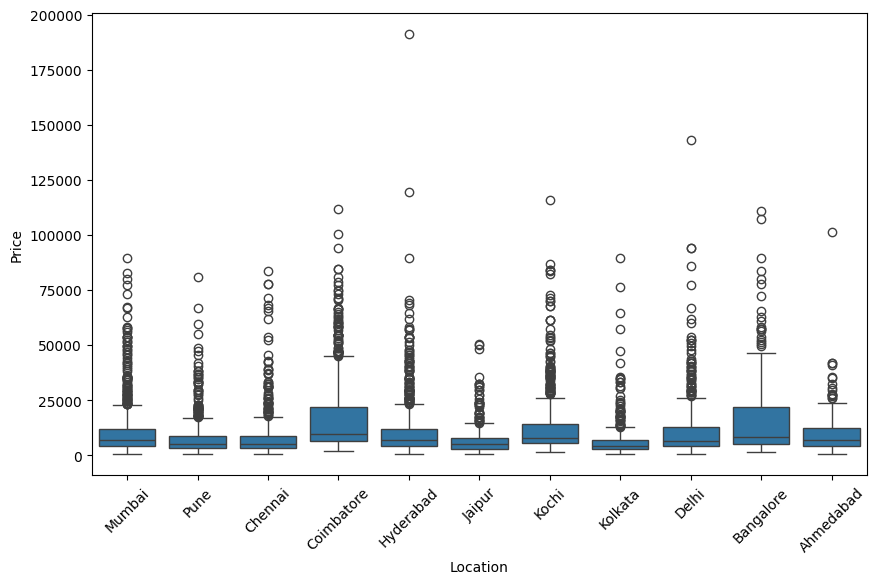

In [357]:
# Check Location and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Price', data=df)
plt.xticks(rotation=45)
plt.show()


Because name have many varible and hard to handle so we will drop it. Location does not have much influence on car prices, so I will also drop it.

In [358]:
df.drop('Name', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)

### 2. EDA (Exploratory Data Analysis)

In [359]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,AgeofCar,Brand
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,2090.80,14,Maruti
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,14934.29,9,Hyundai
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,5376.34,13,Honda
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,7168.46,12,Maruti
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,21194.74,11,Audi


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               6017 non-null   int64   
 1   Kilometers_Driven  6017 non-null   int64   
 2   Fuel_Type          6017 non-null   category
 3   Transmission       6017 non-null   category
 4   Owner_Type         6017 non-null   category
 5   Mileage            5949 non-null   float64 
 6   Engine             5981 non-null   float64 
 7   Power              5874 non-null   float64 
 8   Seats              5974 non-null   float64 
 9   Price              6017 non-null   float64 
 10  AgeofCar           6017 non-null   int64   
 11  Brand              6017 non-null   category
dtypes: category(4), float64(5), int64(3)
memory usage: 577.4 KB


In [361]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6017.0,2013.358152,3.269967,1998.00,2011.0,2014.00,2016.00,2019.00
Kilometers_Driven,6017.0,58742.282034,91283.745583,171.00,34000.0,53000.00,73000.00,6500000.00
Mileage,5949.0,18.342252,4.175475,6.40,15.3,18.20,21.10,33.54
Engine,5981.0,1621.505935,601.117630,624.00,1198.0,1493.00,1984.00,5998.00
Power,5874.0,113.272203,53.873317,34.20,75.0,97.70,138.10,560.00
Seats,5974.0,5.279712,0.806138,2.00,5.0,5.00,5.00,10.00
Price,6017.0,11324.181270,13368.703773,525.69,4181.6,6738.35,11887.69,191158.90
AgeofCar,6017.0,10.641848,3.269967,5.00,8.0,10.00,13.00,26.00


Observations
- Kilometer_Driven have median is 53k km, mean is about 58k km but max is 6500k km. This seem to be a outlier, need to analyze further.
- Price have median is about 6k7 USD, mean is about 11k3 USD but max is about 191k USD. Need to analyze further.

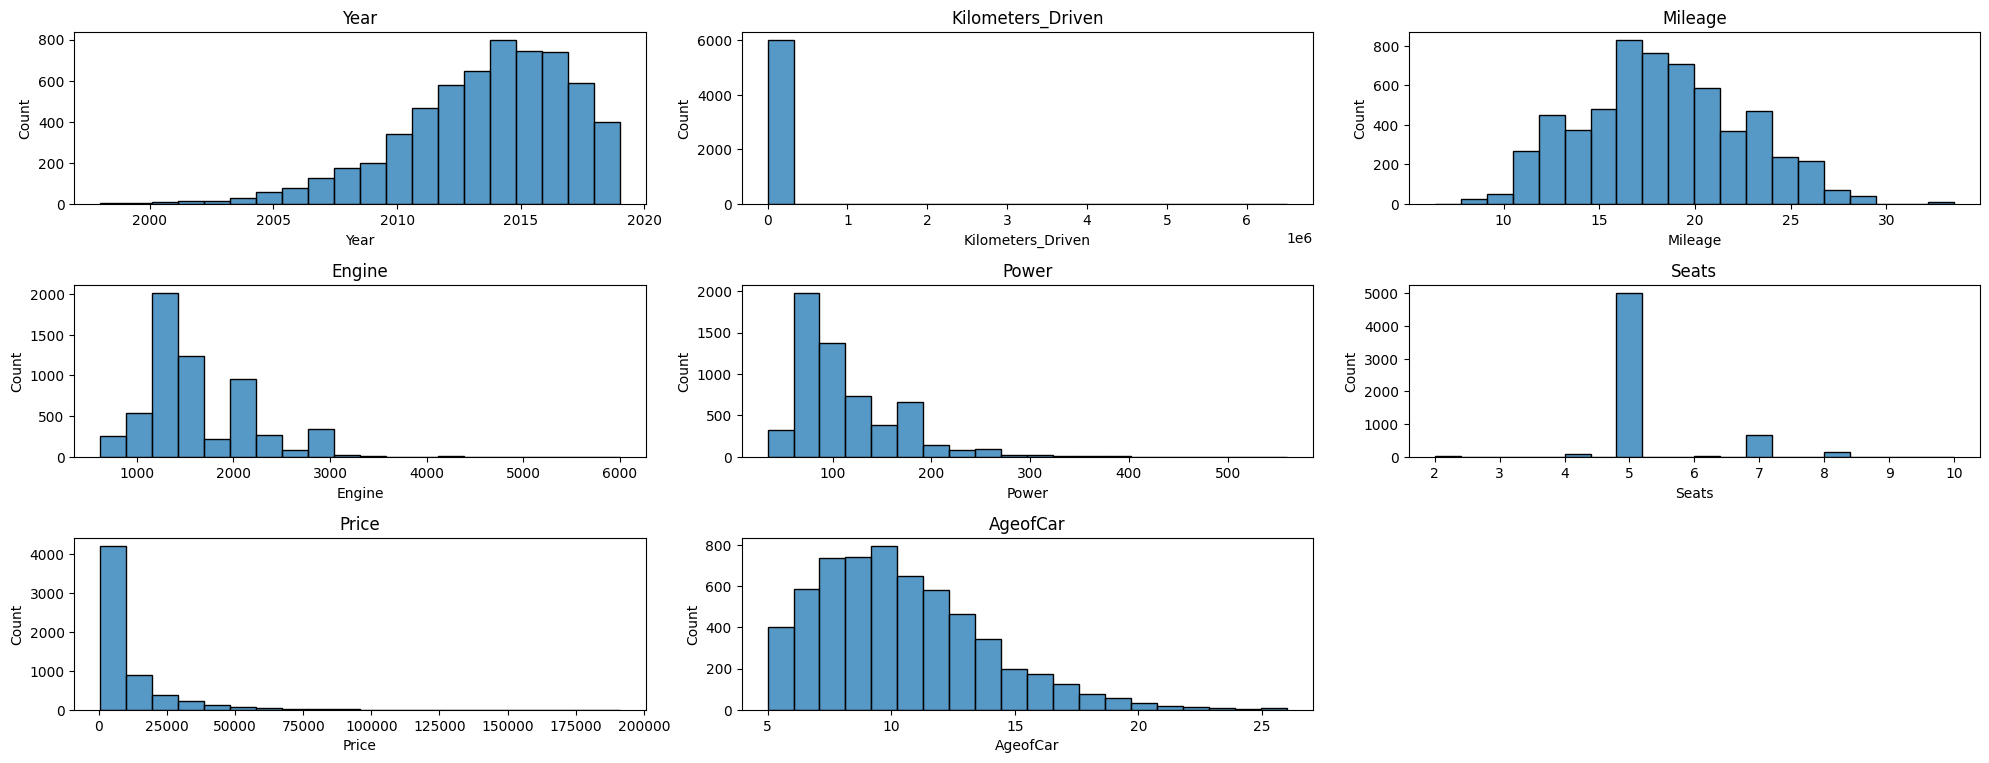

In [362]:
# Select all quantitative columns for checking the spread
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 25))

for i, col in enumerate(num_cols):
    plt.subplot(10, 3, i+1)
    sns.histplot(df[col], kde=False, bins=20)
    plt.title(col)

plt.tight_layout()
plt.show()

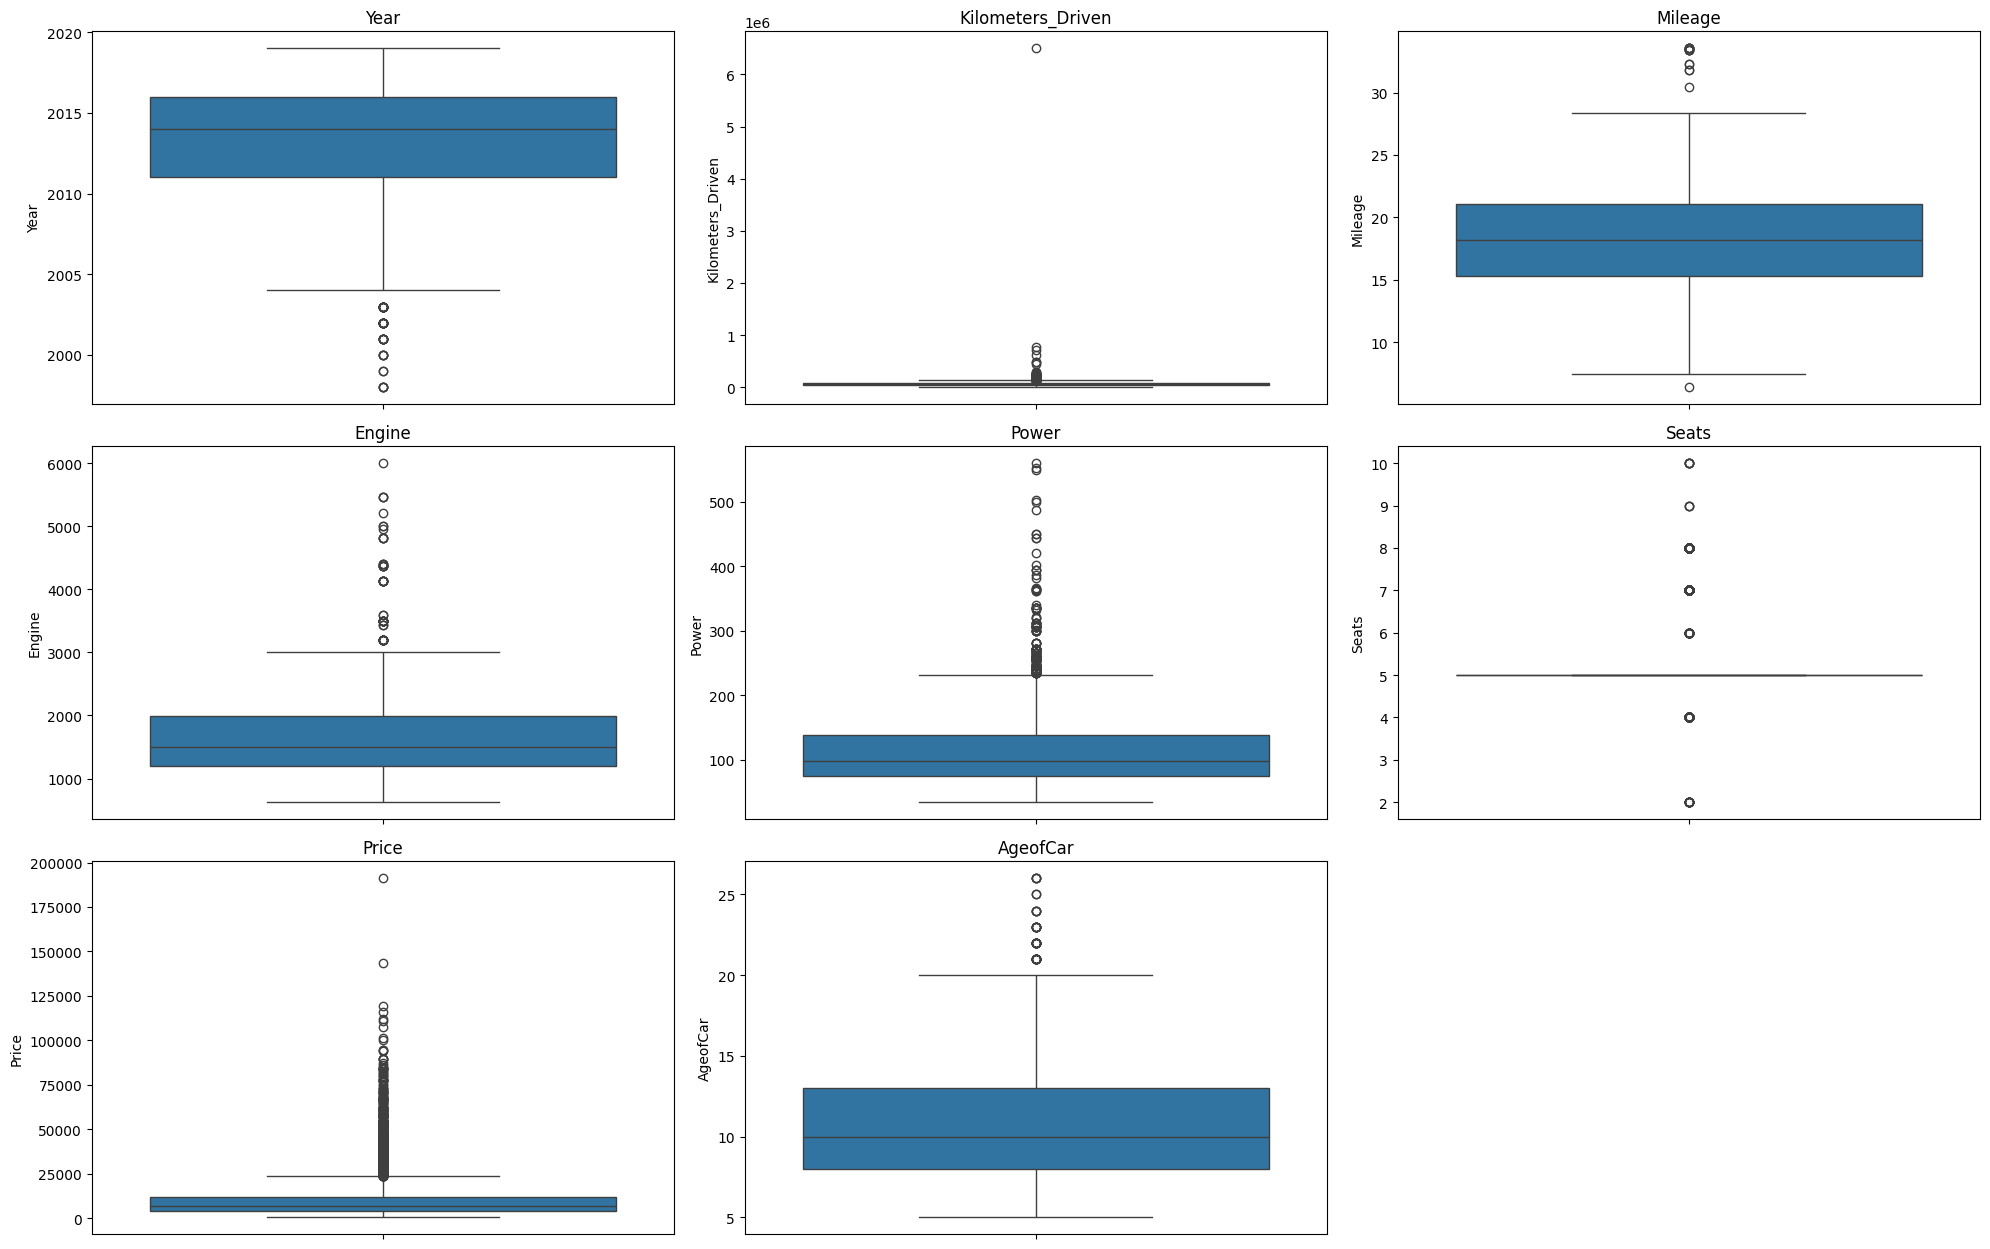

In [363]:
# Check for outliers of numerical columns
plt.figure(figsize=(20, 25))

for i, col in enumerate(num_cols):
    plt.subplot(6, 3, i+1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Observations
- Kilometer_Driven have median is 53k km, mean is about 58k km but max is 6500k km. This seem to be a outlier, need to analyze further.
- There is contain 1 car with high price(>150k $)

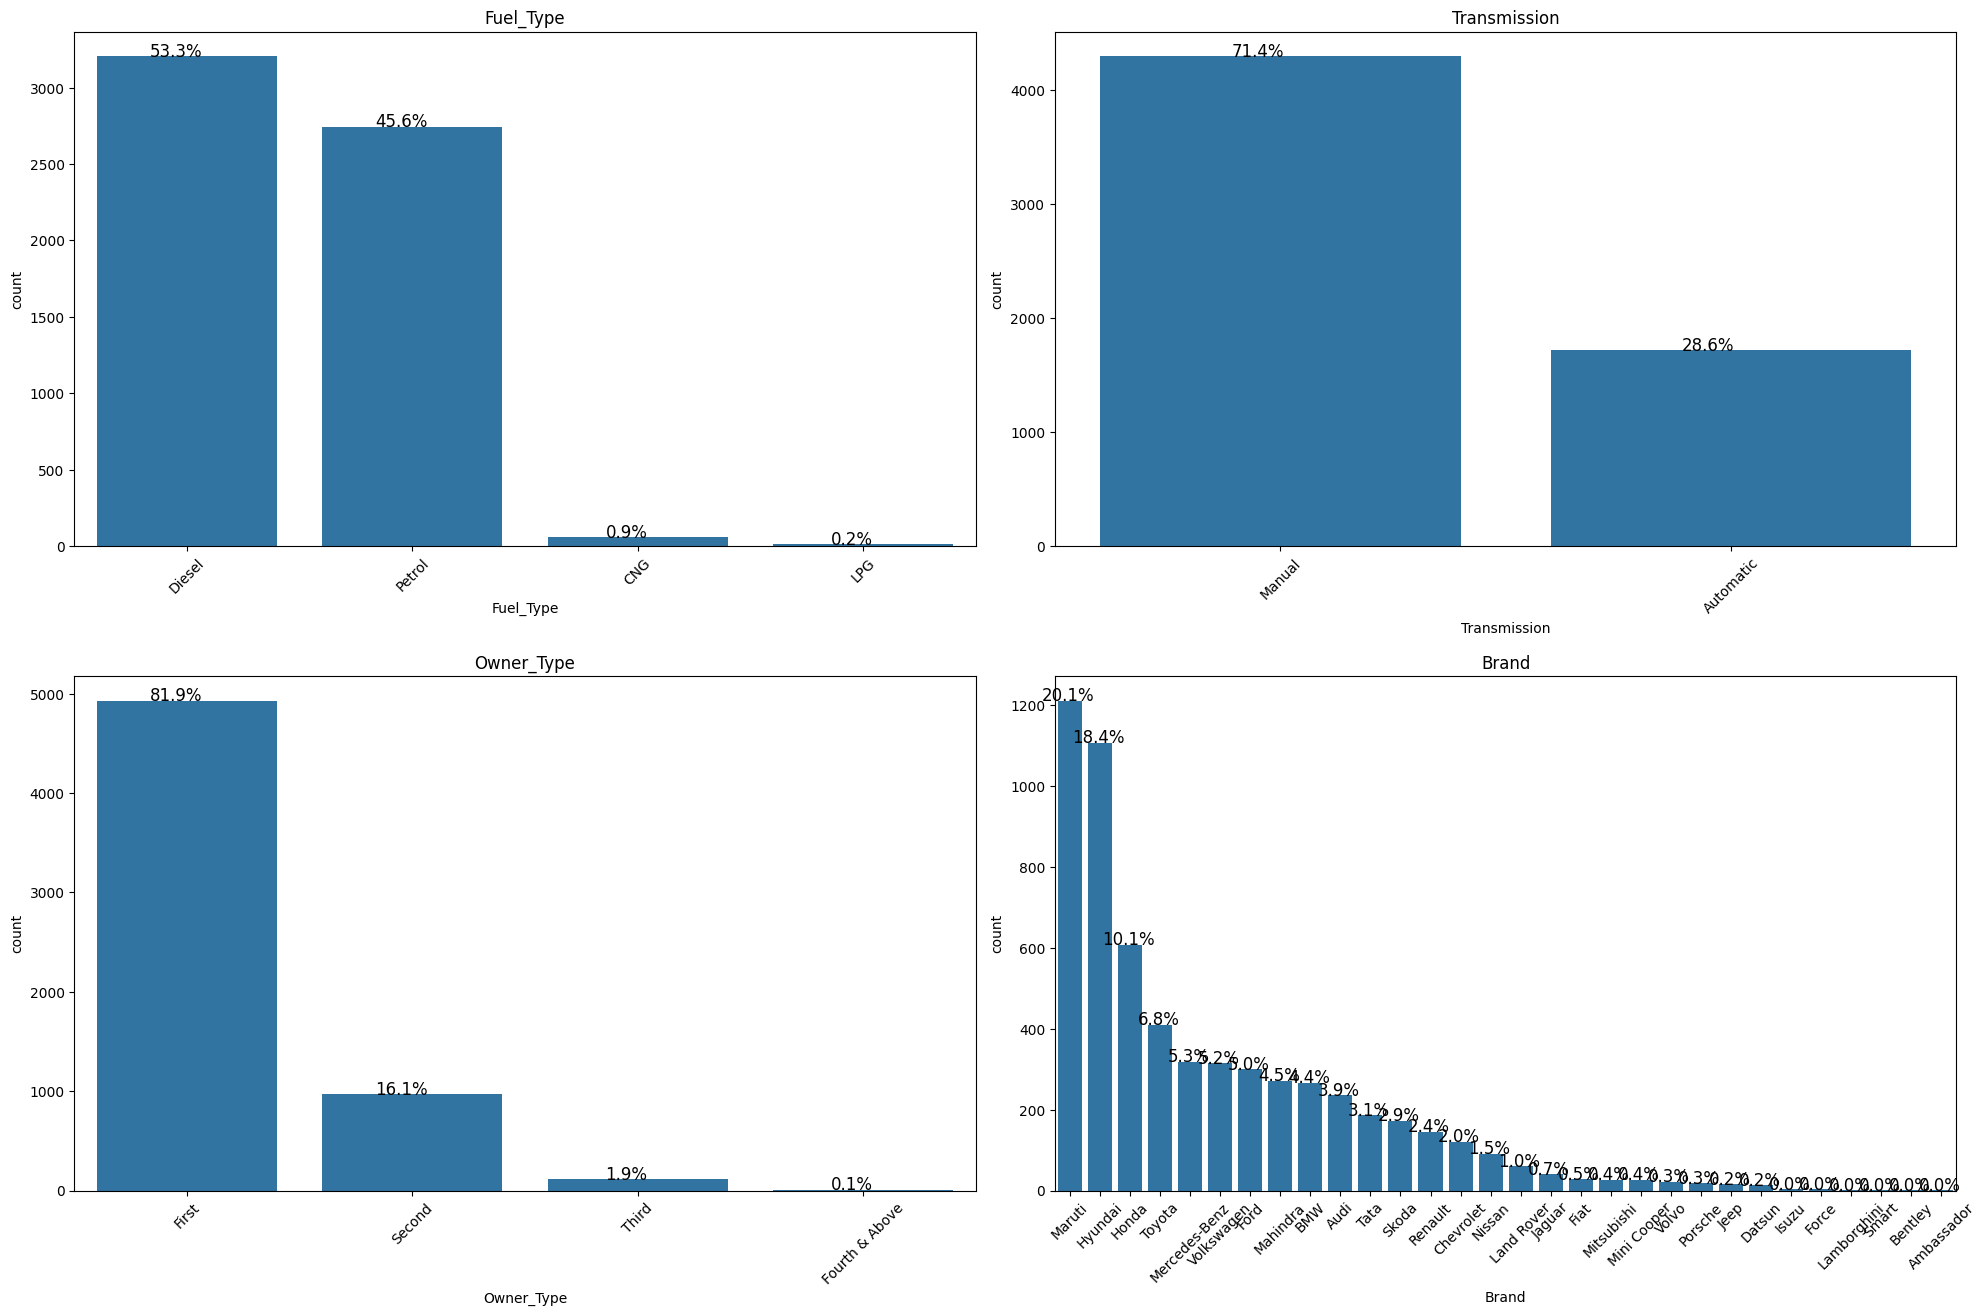

In [364]:
# Select all categories columns for checking the spread
cat_columns=['Fuel_Type','Transmission', 'Owner_Type', 'Brand']

plt.figure(figsize=(20, 25))

for i, col in enumerate(cat_columns):
    plt.subplot(4, 2, i+1)
    order = df[col].value_counts(ascending=False).index
    ax = sns.countplot(data=df, x=col, order=order)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[col])) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, ha='center')
    plt.xticks(rotation=45)
    plt.title(col)

plt.tight_layout()
plt.show()

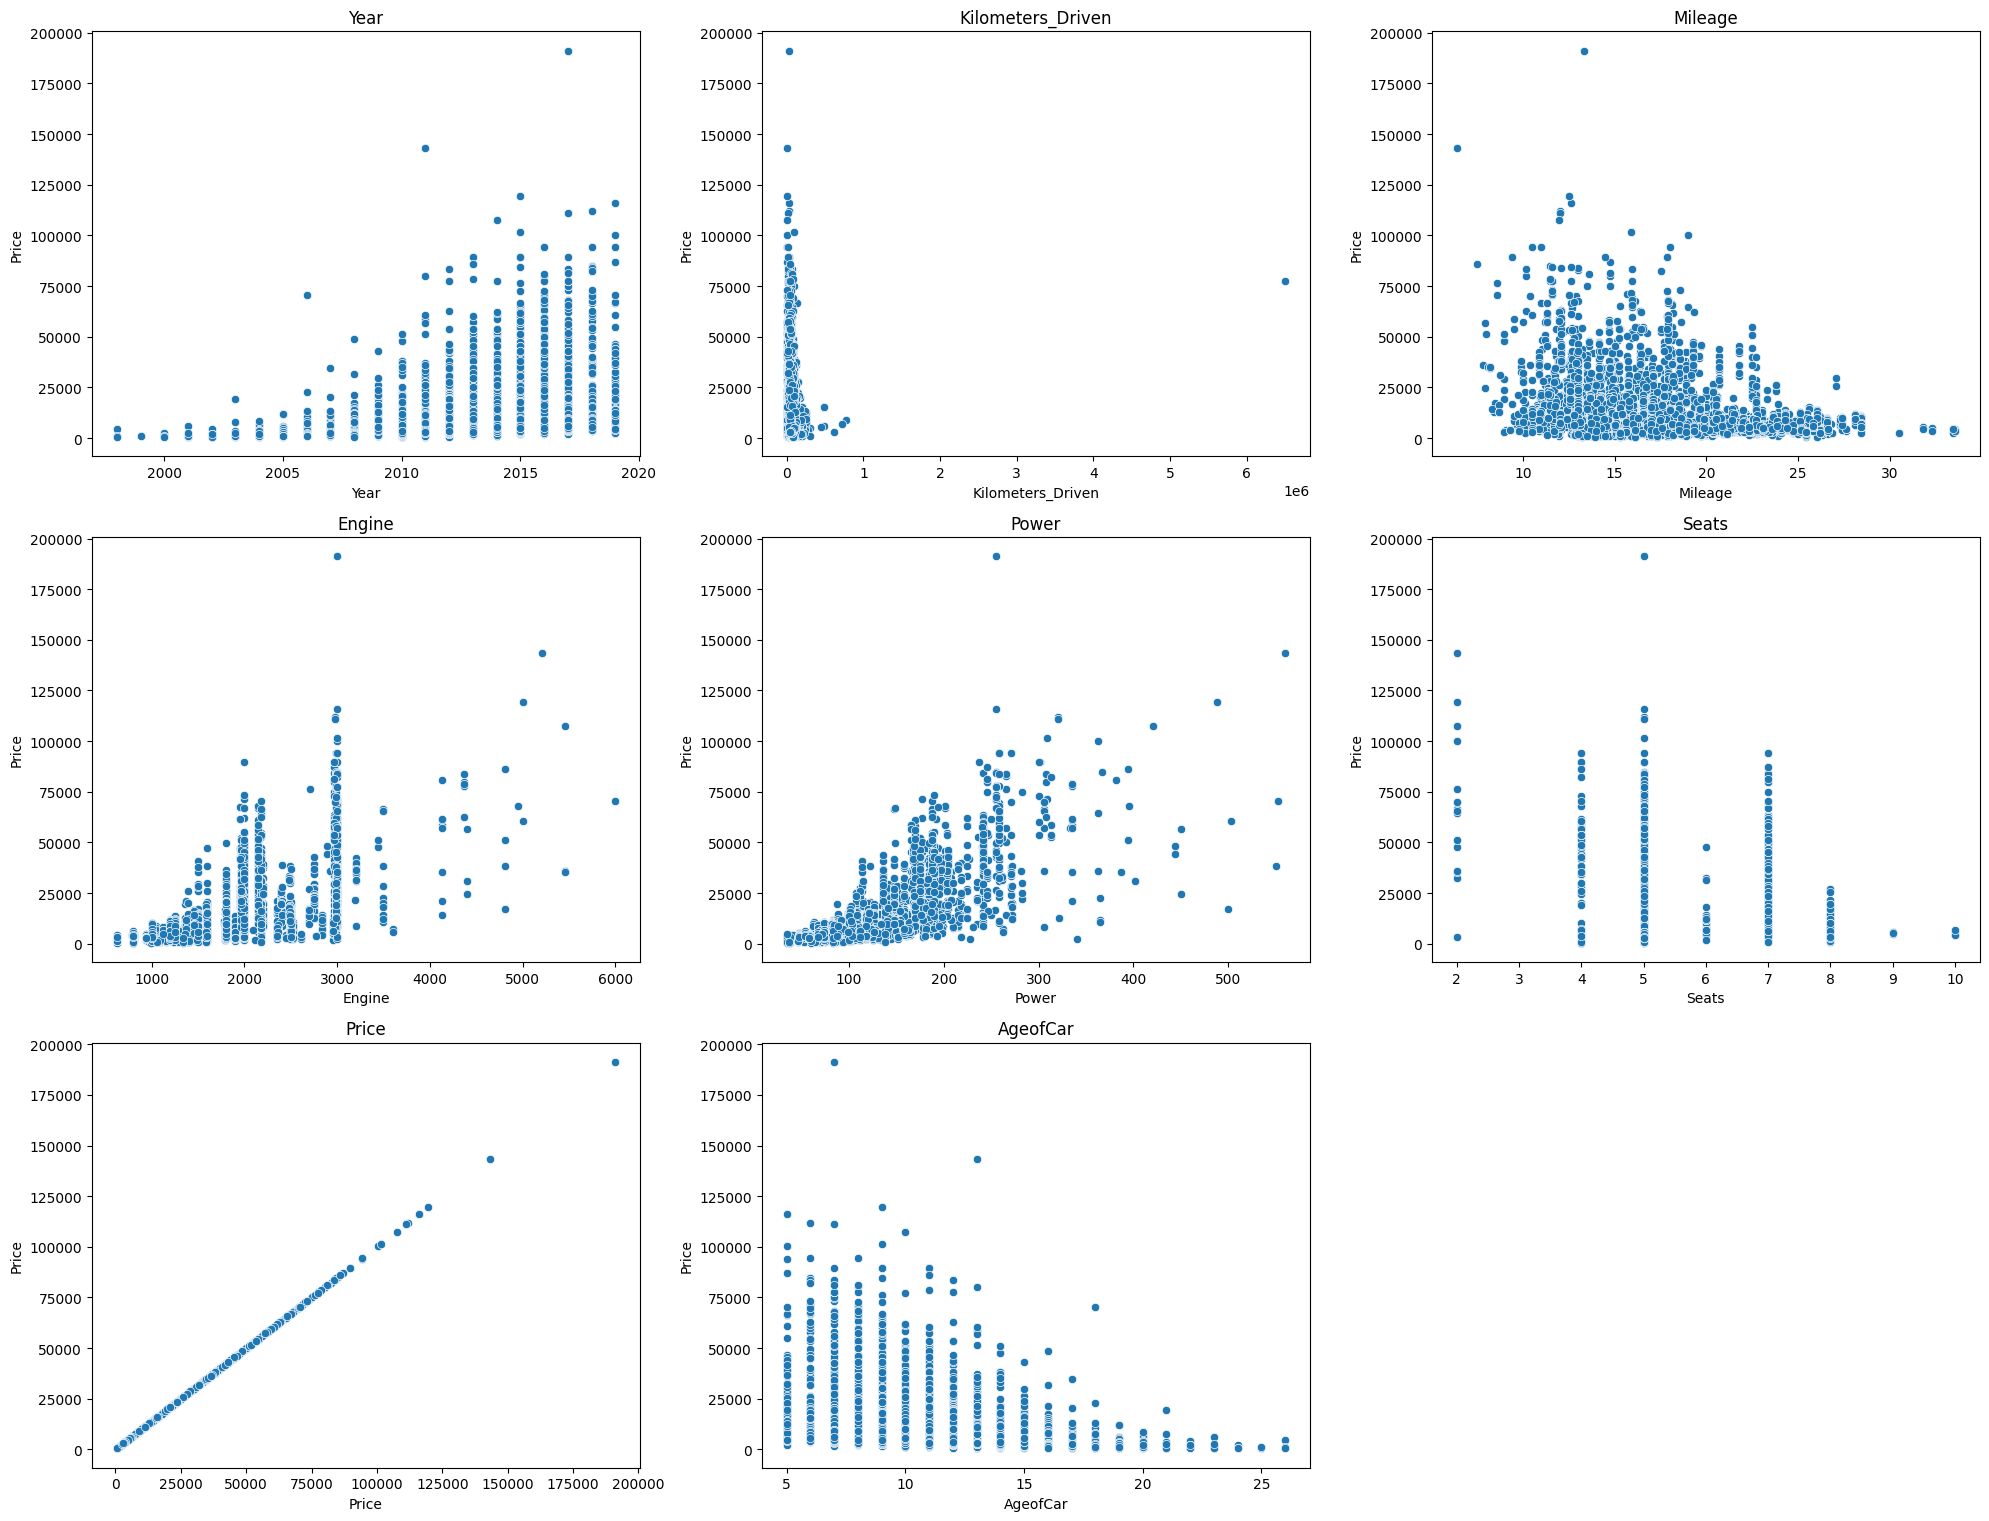

In [365]:
# Check the correlation between the features and price
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 25))
for i, col in enumerate(num_cols):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data=df, x=col, y='Price')
    plt.title(col)

plt.tight_layout()
plt.show()


In [366]:
# Check the correlation between the features vs Price
pd.DataFrame(df[num_cols].corr()['Price'].sort_values(ascending=False))

,Price
Price,1.000000
Power,0.772837
Engine,0.658855
Year,0.305355
Seats,0.053283
Kilometers_Driven,-0.011480
AgeofCar,-0.305355
Mileage,-0.333263


Observations

Car Profile
- 71.4% cars available for sell have manual Transmission.
- 81.9% cars are First owned cars.
- 38.5% of car available for sale are from Maruti & Hyundai brands.
- 53.2% of car being sold/avialable for purchase have fuel type as Diesel.
- Most of the cars are 5 seats.
- Car being sold/available for purchase are in 5 - 26 years old
- Power and Engine have high effect into price

### 3. Handling missing values and outliers

In [367]:
df.isnull().sum()

Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               68
Engine                36
Power                143
Seats                 43
Price                  0
AgeofCar               0
Brand                  0
dtype: int64

Fill null values with mean of that col

In [368]:
# Fill null values with mean
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Engine'].fillna(df['Engine'].mean(), inplace=True)
df['Power'].fillna(df['Power'].mean(), inplace=True)

Because seats must be int so we will fill it rounded mean

In [369]:
df['Seats'].fillna(round(df['Seats'].mean()), inplace=True)

In [370]:
# Fill null values in seats with mode
df['Seats'].fillna(df['Seats'].mode()[0], inplace=True)

In [371]:
df.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
AgeofCar             0
Brand                0
dtype: int64

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               6017 non-null   int64   
 1   Kilometers_Driven  6017 non-null   int64   
 2   Fuel_Type          6017 non-null   category
 3   Transmission       6017 non-null   category
 4   Owner_Type         6017 non-null   category
 5   Mileage            6017 non-null   float64 
 6   Engine             6017 non-null   float64 
 7   Power              6017 non-null   float64 
 8   Seats              6017 non-null   float64 
 9   Price              6017 non-null   float64 
 10  AgeofCar           6017 non-null   int64   
 11  Brand              6017 non-null   category
dtypes: category(4), float64(5), int64(3)
memory usage: 577.4 KB


Check Kilometer_Driven outliers

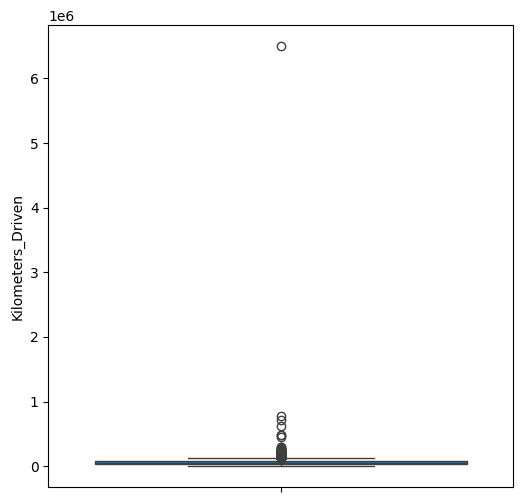

In [373]:
# Kilometers driven outliers
plt.figure(figsize=(6, 6))
sns.boxplot(df['Kilometers_Driven'])
plt.show()

In [374]:
df[df['Kilometers_Driven'] > 2000000]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,AgeofCar,Brand
2328,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,77658.3,7,BMW


This varible can reduce model performance so we will delete it.

In [375]:
df.drop(df[df['Kilometers_Driven'] > 2000000].index, inplace=True)

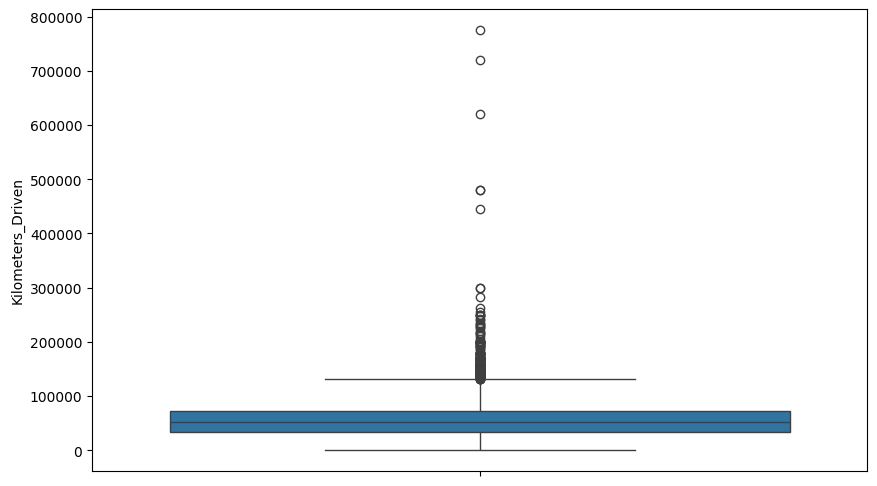

In [376]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['Kilometers_Driven'])
plt.show()

#### Save cleaned data

In [377]:
df.to_csv('./data/cleaned_train_data.csv', index=False)

In [378]:
# Save the cleaned data in sqlite database
import sqlite3

conn = sqlite3.connect('./data/cars.db')
c = conn.cursor()

df.to_sql('cars', conn, if_exists='replace', index=False)

c.execute('SELECT * FROM cars').fetchall()

conn.commit()

conn.close()

### 4. Model Building

In [379]:
# Load the data from sqlite database
conn = sqlite3.connect('./data/cars.db')
c = conn.cursor()

df = pd.read_sql('SELECT * FROM cars', conn)

conn.close()

In [380]:
# Encoding Object Data
encoder = OrdinalEncoder()

cat_cols = df.select_dtypes(include='object').columns.tolist()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

df.head()


,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,AgeofCar,Brand
0,2010,72000,0.0,1.0,0.0,26.60,998.0,58.16,5.0,2090.80,14,17.0
1,2015,41000,1.0,1.0,0.0,19.67,1582.0,126.20,5.0,14934.29,9,10.0
2,2011,46000,3.0,1.0,0.0,18.20,1199.0,88.70,5.0,5376.34,13,9.0
3,2012,87000,1.0,1.0,0.0,20.77,1248.0,88.76,7.0,7168.46,12,17.0
4,2013,40670,1.0,0.0,2.0,15.20,1968.0,140.80,5.0,21194.74,11,1.0


In [78]:
# see inside the encoder
encoder.categories_

[array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First', 'Fourth & Above', 'Second', 'Third'], dtype=object),
 array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
        'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar',
        'Jeep', 'Lamborghini', 'Land Rover', 'Mahindra', 'Maruti',
        'Mercedes-Benz', 'Mini Cooper', 'Mitsubishi', 'Nissan', 'Porsche',
        'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object)]

In [79]:
# Save the encoder
with open('./app/encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

In [80]:
# Splitting the data
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4812, 11), (1204, 11), (4812,), (1204,))

#### Modeling

In [81]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Predict training data
    y_train_pred = model.predict(X_train)
    # Predict test data
    y_test_pred = model.predict(X_test)
    
    # Evaluate training data
    train_r2 = model.score(X_train, y_train)
    train_rmse = np.sqrt(np.mean((y_train - y_train_pred) ** 2))
    
    # Evaluate test data
    test_r2 = model.score(X_test, y_test)
    test_rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
    
    return {
        'Model': model_name,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Test R2': test_r2,
        'Test RMSE': test_rmse
    }

In [82]:
# Initialize a list to hold the results
results = []

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
results.append(evaluate_model(lr, X_train, y_train, X_test, y_test, 'Linear Regression'))

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
results.append(evaluate_model(rf, X_train, y_train, X_test, y_test, 'Random Forest'))

# ADA Boost
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
results.append(evaluate_model(ada, X_train, y_train, X_test, y_test, 'ADA Boost'))

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
results.append(evaluate_model(gb, X_train, y_train, X_test, y_test, 'Gradient Boosting'))

# XGBoost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
results.append(evaluate_model(xgb, X_train, y_train, X_test, y_test, 'XGBoost'))

# Create a DataFrame from the results
results_df = pd.DataFrame(results)


In [83]:
results_df

,Model,Train R2,Train RMSE,Test R2,Test RMSE
0,Linear Regression,0.696926,7457.541266,0.698318,6857.250391
1,Random Forest,0.982023,1816.280439,0.915598,3627.024977
2,ADA Boost,0.595045,8620.349713,0.506455,8770.796263
3,Gradient Boosting,0.927349,3651.262458,0.895421,4037.358018
4,XGBoost,0.993630,1081.155622,0.906959,3808.144988


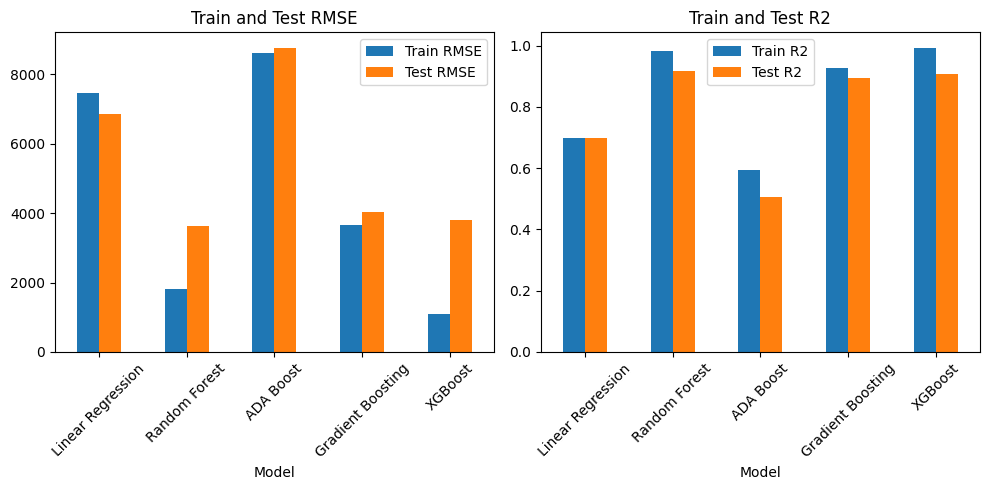

In [84]:
# Plot the Train and Test RMSE, R2 for each model.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

results_df.plot(kind='bar', x='Model', y=['Train RMSE', 'Test RMSE'], ax=axes[0])
results_df.plot(kind='bar', x='Model', y=['Train R2', 'Test R2'], ax=axes[1])

axes[0].set_title('Train and Test RMSE')
axes[1].set_title('Train and Test R2')

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



We can see that the Random Forest and XGBoost models have the highest R² scores and the lowest RMSE scores. However, on the test data, the Random Forest model performs better, so we choose the Random Forest model.

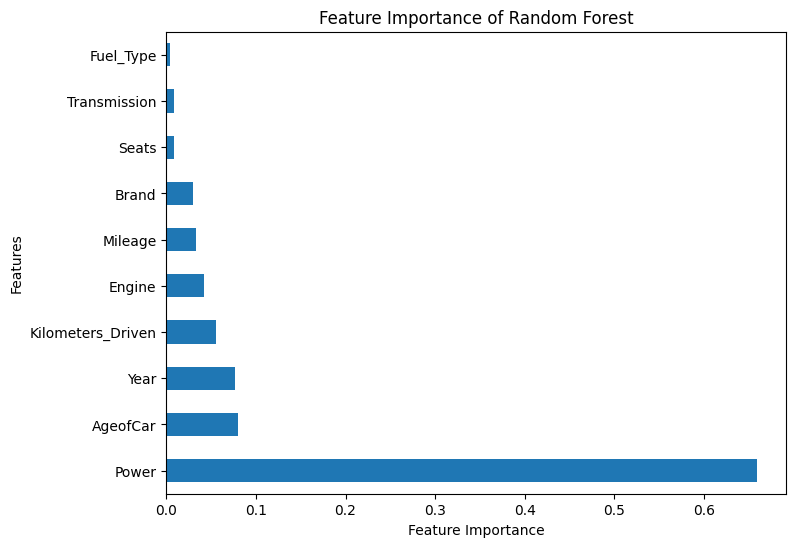

In [85]:
# Show the feature importance
fig =  plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)
pd.Series(rf.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Random Forest')
plt.show()

In [86]:
# Find the best parameters for the model and train the model with all the data.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print('Best score:', grid_search.best_score_)
print('Best parameters:', grid_search.best_params_)


Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best score: 0.8646410498925509
Best parameters: {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [92]:
grid_eval = evaluate_model(grid_search, X_train, y_train, X_test, y_test, 'Random Forest Grid Search')

grid_eval_df = pd.DataFrame([grid_eval])

grid_eval_df

,Model,Train R2,Train RMSE,Test R2,Test RMSE
0,Random Forest Grid Search,0.962754,2614.318575,0.911728,3709.256227


#### Train model with all of the data

In [93]:
# Train the model with all the data
model = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
model.fit(X, y)

print('Best score:', model.best_score_)
print('Best parameters:', model.best_params_)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best score: 0.8769400635132095
Best parameters: {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [94]:
# Save the model
with open('./app/model.pkl', 'wb') as f:
    pickle.dump(grid_search, f)



#### Predict Price for test_data

In [203]:
test_data = pd.read_csv('./data/test_data.csv')

test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [204]:
# Preprocessing the test data
test_data.drop('Unnamed: 0', axis=1, inplace=True)
test_data.drop('New_Price', axis=1, inplace=True)

test_data['Mileage'] = test_data['Mileage'].str.split().str[0]
test_data['Engine'] = test_data['Engine'].str.split().str[0]
test_data['Power'] = test_data['Power'].str.rstrip(' bhp')
test_data['Power'] = test_data['Power'].replace(regex='null', value=np.nan)

test_data['Mileage'] = test_data['Mileage'].astype(float)
test_data['Engine'] = test_data['Engine'].astype(float)
test_data['Power'] = test_data['Power'].astype(float)
test_data['Seats'] = test_data['Seats'].astype(float)

test_data['Current_Year'] = 2024
test_data['AgeofCar'] = test_data['Current_Year'] - test_data['Year']
test_data = test_data.drop(['Current_Year'], axis=1)

test_data['Brand'] = test_data['Name'].str.split().str[0]

test_data['Brand'].unique()

test_data.loc[test_data['Brand'] == 'Mini', 'Brand'] = 'Mini Cooper'
test_data.loc[test_data['Brand'] == 'Land', 'Brand'] = 'Land Rover'
test_data.loc[test_data['Brand'] == 'ISUZU', 'Brand'] = 'Isuzu'

test_data.drop('Name', axis=1, inplace=True)
test_data.drop('Location', axis=1, inplace=True)

test_data['Fuel_Type'] = test_data['Fuel_Type'].astype('category')
test_data['Transmission'] = test_data['Transmission'].astype('category')
test_data['Owner_Type'] = test_data['Owner_Type'].astype('category')
test_data['Brand'] = test_data['Brand'].astype('category')

test_data['Mileage'].fillna(test_data['Mileage'].mean(), inplace=True)
test_data['Engine'].fillna(test_data['Engine'].mean(), inplace=True)
test_data['Power'].fillna(test_data['Power'].mean(), inplace=True)

test_data['Seats'].fillna(round(test_data['Seats'].mean()), inplace=True)

test_data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,AgeofCar,Brand
0,2014,40929,CNG,Manual,First,32.26,998.0,58.20000,4.0,10,Maruti
1,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30000,5.0,11,Maruti
2,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80000,7.0,7,Toyota
3,2012,139000,Diesel,Manual,First,23.59,1364.0,110.38042,5.0,12,Toyota
4,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85000,5.0,10,Hyundai


In [205]:
# Encoding Object Data if Brand is not in the encoder categories then replace it with the most frequent category
cat_cols = test_data.select_dtypes(include='category').columns.tolist()
for col in cat_cols:
    test_data[col] = test_data[col].apply(lambda x: x if x in encoder.categories_[cat_cols.index(col)] else encoder.categories_[cat_cols.index(col)][0])

test_data[cat_cols] = encoder.transform(test_data[cat_cols])

test_data.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,AgeofCar,Brand
0,2014,40929,0.0,1.0,0.0,32.26,998.0,58.20000,4.0,10,17.0
1,2013,54493,3.0,1.0,2.0,24.70,796.0,47.30000,5.0,11,17.0
2,2017,34000,1.0,1.0,0.0,13.68,2393.0,147.80000,7.0,7,27.0
3,2012,139000,1.0,1.0,0.0,23.59,1364.0,110.38042,5.0,12,27.0
4,2014,29000,3.0,1.0,0.0,18.50,1197.0,82.85000,5.0,10,10.0


In [206]:
# Load the model
with open('./app/model.pkl', 'rb') as f:
    model = pickle.load(f)

# Predict the test data
predictions = model.predict(test_data)

original_test_data = pd.read_csv('./data/test_data.csv')
original_test_data['Price'] = predictions

original_test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,4093.312655
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,2821.607674
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh,21290.405197
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,4083.174502
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,5771.041052


In [207]:
# Save the predicted test data
original_test_data.to_csv('./data/predicted_test_data.csv', index=False)